<a href="https://colab.research.google.com/github/sowjanya2122/VOIS_AICTE_project_kotagiri_Sai_Sowjanya/blob/main/AI_NIDS_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pandas numpy scikit-learn seaborn matplotlib

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [3]:
np.random.seed(42)

# Simulated features
data = {
    'packet_size': np.random.randint(40, 1500, 1000),
    'flow_duration': np.random.randint(1, 5000, 1000),
    'src_bytes': np.random.randint(0, 10000, 1000),
    'dst_bytes': np.random.randint(0, 10000, 1000),
    'protocol_type': np.random.randint(0, 3, 1000),
    'label': np.random.choice([0, 1], 1000, p=[0.7, 0.3])  # 0=Normal, 1=Attack
}

df = pd.DataFrame(data)
df.head()


,packet_size,flow_duration,src_bytes,dst_bytes,protocol_type,label
0,1166,1811,454,6993,1,0
1,1499,724,9816,4033,1,0
2,900,225,2772,5443,2,0
3,1334,4628,3726,989,1,1
4,1170,4209,7232,3744,2,1


In [4]:
X = df.drop('label', axis=1)
y = df['label']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)


In [5]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

print("Model training completed successfully")


Model training completed successfully


In [6]:
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.655

Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.96      0.79       135
           1       0.17      0.02      0.03        65

    accuracy                           0.66       200
   macro avg       0.42      0.49      0.41       200
weighted avg       0.51      0.66      0.54       200



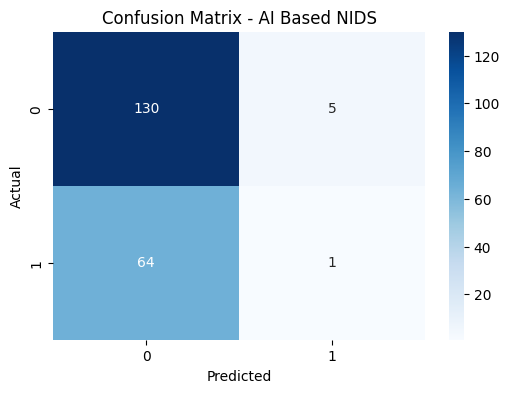

In [7]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - AI Based NIDS")
plt.show()
